In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import wandb

from spd.nathu_dev_utils import ( 
    get_experiment_df, 
    safe_first, 
    aggregate_over, 
    optimize_over, 
    get_varying_columns,
    plot_scatter_grid,
    plot_metrics_by_group
)



In [3]:
from spd.registry import EXPERIMENT_REGISTRY
wandb_project = 'nathu-spd-sigmoid_sweeps'
sweep_run_id = 'run_20250714_235034'
experiment_dfs = {}
for experiment_name in EXPERIMENT_REGISTRY.keys():
    try:
        experiment_dfs[experiment_name] = get_experiment_df(
            project=wandb_project,
            sweep_run_id=sweep_run_id,
            experiment_name=experiment_name,
            )
    except Exception as e:
        print(f"Error fetching data for {experiment_name}: {e}")

tms_5-2 - run_20250714_235034: 0it [00:00, ?it/s]
tms_5-2-id - run_20250714_235034: 100%|██████████| 119/119 [00:00<00:00, 14171.15it/s]
tms_40-10 - run_20250714_235034: 0it [00:00, ?it/s]
resid_mlp3 - run_20250714_235034: 100%|██████████| 120/120 [00:00<00:00, 12128.11it/s]


In [4]:

opt_dfs = {}
for experiment_name, df in experiment_dfs.items():
    if len(df) == 0:
        continue
    print(f"\n\nOptimizing {experiment_name}...")
    opt_dfs[experiment_name] = optimize_over(df, 'summary.target_solution_error/total', 
                                             params=['config.importance_minimality_coeff'], 
                                             verbose=True, aggregate_cols=['config.seed'])



Optimizing tms_5-2-id...
Aggregating over ['config.seed'] before optimization...
When config.sigmoid_type=hard, config.p_anneal_start_frac=1.0: optimal params are importance_minimality_coeff=0.01 (summary.target_solution_error/total=7.0000)
When config.sigmoid_type=leaky_hard, config.p_anneal_start_frac=1.0: optimal params are importance_minimality_coeff=0.003 (summary.target_solution_error/total=2.0000)
When config.sigmoid_type=normal, config.p_anneal_start_frac=1.0: optimal params are importance_minimality_coeff=0.003 (summary.target_solution_error/total=7.0000)
When config.sigmoid_type=scaled, config.p_anneal_start_frac=1.0: optimal params are importance_minimality_coeff=0.003 (summary.target_solution_error/total=0.0000)
When config.sigmoid_type=scaled, config.p_anneal_start_frac=nan: optimal params are importance_minimality_coeff=0.003 (summary.target_solution_error/total=6.0000)
When config.sigmoid_type=swish_hard, config.p_anneal_start_frac=1.0: optimal params are importance_mi

/mnt/polished-lake/home/nhu/spd/spd/nathu_dev_utils.py:321: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  working_df.groupby(group_cols, dropna=False).apply(get_optimal_rows, include_groups=True).reset_index(drop=True)


When config.sigmoid_type=hard: optimal params are importance_minimality_coeff=0.0001 (summary.target_solution_error/total=0.0000)
When config.sigmoid_type=leaky_hard: optimal params are importance_minimality_coeff=0.0001 (summary.target_solution_error/total=0.0000)
When config.sigmoid_type=normal: optimal params are importance_minimality_coeff=0.001 (summary.target_solution_error/total=251.2500)
When config.sigmoid_type=scaled: optimal params are importance_minimality_coeff=0.0003 (summary.target_solution_error/total=140.5000)
When config.sigmoid_type=swish_hard: optimal params are importance_minimality_coeff=0.0001 (summary.target_solution_error/total=0.0000)
When config.sigmoid_type=upper_leaky_hard: optimal params are importance_minimality_coeff=0.0001 (summary.target_solution_error/total=0.0000)

Returning 24 unaggregated runs with optimal parameters
(from 120 total runs)


Optimizing resid_mlp1...
Aggregating over ['config.seed'] before optimization...
When config.sigmoid_type=har

/mnt/polished-lake/home/nhu/spd/spd/nathu_dev_utils.py:321: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  working_df.groupby(group_cols, dropna=False).apply(get_optimal_rows, include_groups=True).reset_index(drop=True)
/mnt/polished-lake/home/nhu/spd/spd/nathu_dev_utils.py:321: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  working_df.groupby(group_cols, dropna=False).apply(get_optimal_rows, include_groups=True).reset

In [8]:
opt_df

,wandb_run_id,run_name,state,tags,sweep_run_id,config.C,config.batch_size,config.embedding_recon_coeff,config.faithfulness_coeff,config.image_freq,...,summary.misc/step,summary.target_solution_error/layers.0.mlp_in,summary.target_solution_error/layers.0.mlp_out,summary.target_solution_error/layers.1.mlp_in,summary.target_solution_error/layers.1.mlp_out,summary.target_solution_error/layers.2.mlp_in,summary.target_solution_error/layers.2.mlp_out,summary.target_solution_error/total,summary.target_solution_error/total_0p2,optimal_hparams
0,xl8t5d3c,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,146,0,108,0,101,0,355,237,{'config.importance_minimality_coeff': 5e-05}
1,xevnvswy,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,163,0,106,0,99,0,368,241,{'config.importance_minimality_coeff': 5e-05}
2,5xutb5tc,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,163,0,110,0,104,0,377,262,{'config.importance_minimality_coeff': 5e-05}
3,gmz4thjq,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,157,0,112,0,102,0,371,243,{'config.importance_minimality_coeff': 5e-05}
4,nyyxfalw,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,234,0,103,0,56,0,393,342,{'config.importance_minimality_coeff': 1.5e-05}
5,5yhk3qcp,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,289,0,101,0,50,0,440,374,{'config.importance_minimality_coeff': 1.5e-05}
6,vn9nlhrn,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,313,0,66,0,50,0,429,369,{'config.importance_minimality_coeff': 1.5e-05}
7,6oxldgj2,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,233,0,111,0,64,0,408,356,{'config.importance_minimality_coeff': 1.5e-05}
8,iapm6h6d,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,21,0,30,0,33,0,84,51,{'config.importance_minimality_coeff': 5e-06}
9,jwvhiaja,resid_mlp3_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp3, run_20250714_235034]",run_20250714_235034,500,2048,None,1,5000,...,100000,19,0,32,0,30,0,81,39,{'config.importance_minimality_coeff': 5e-06}


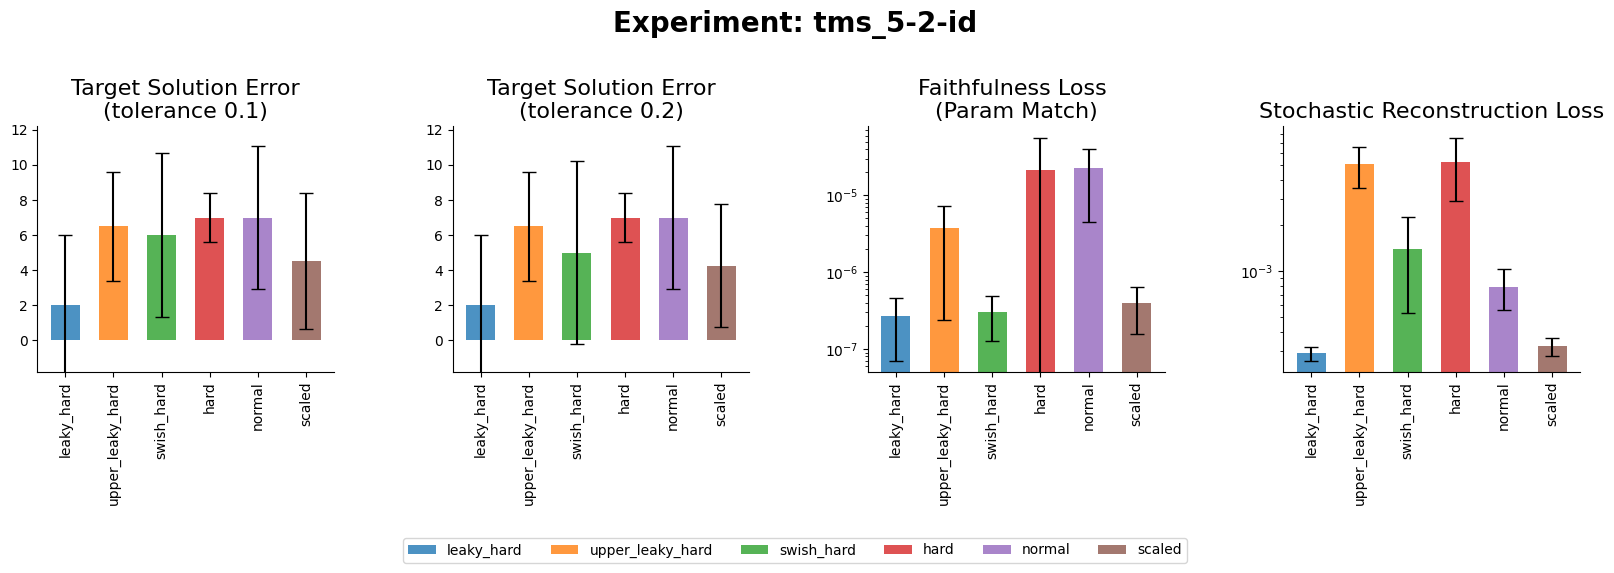

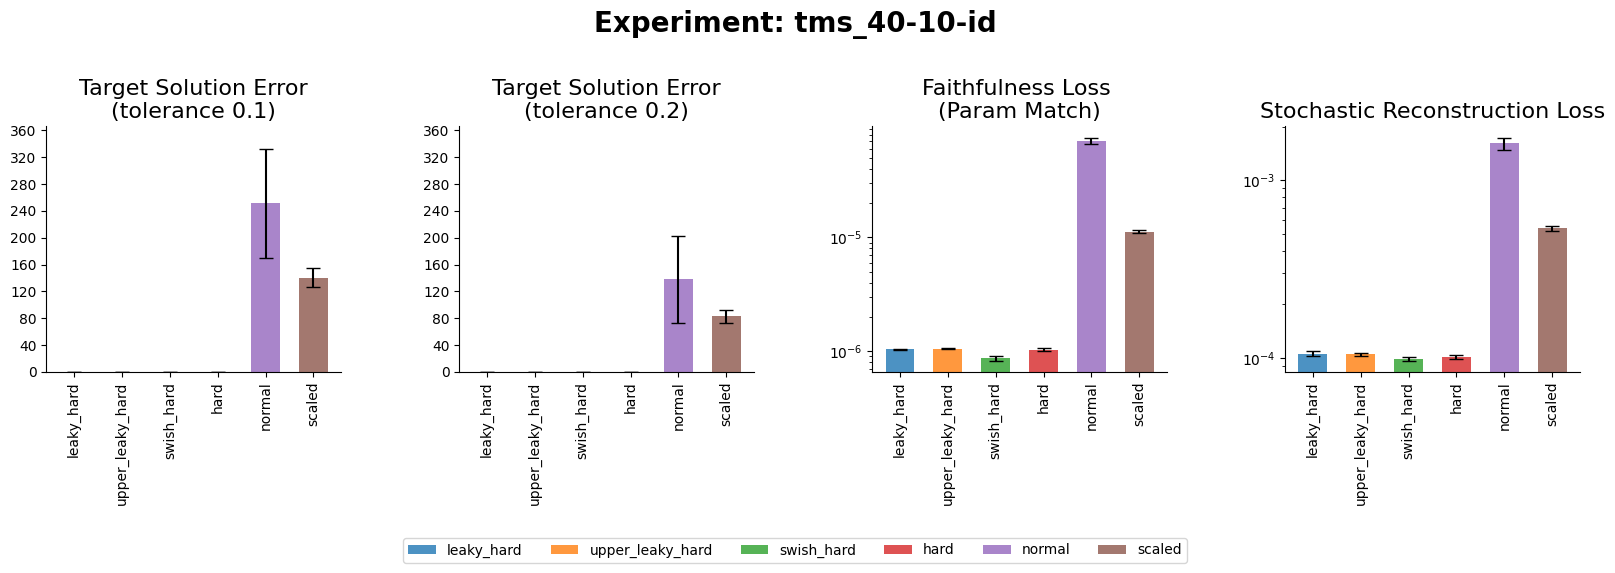

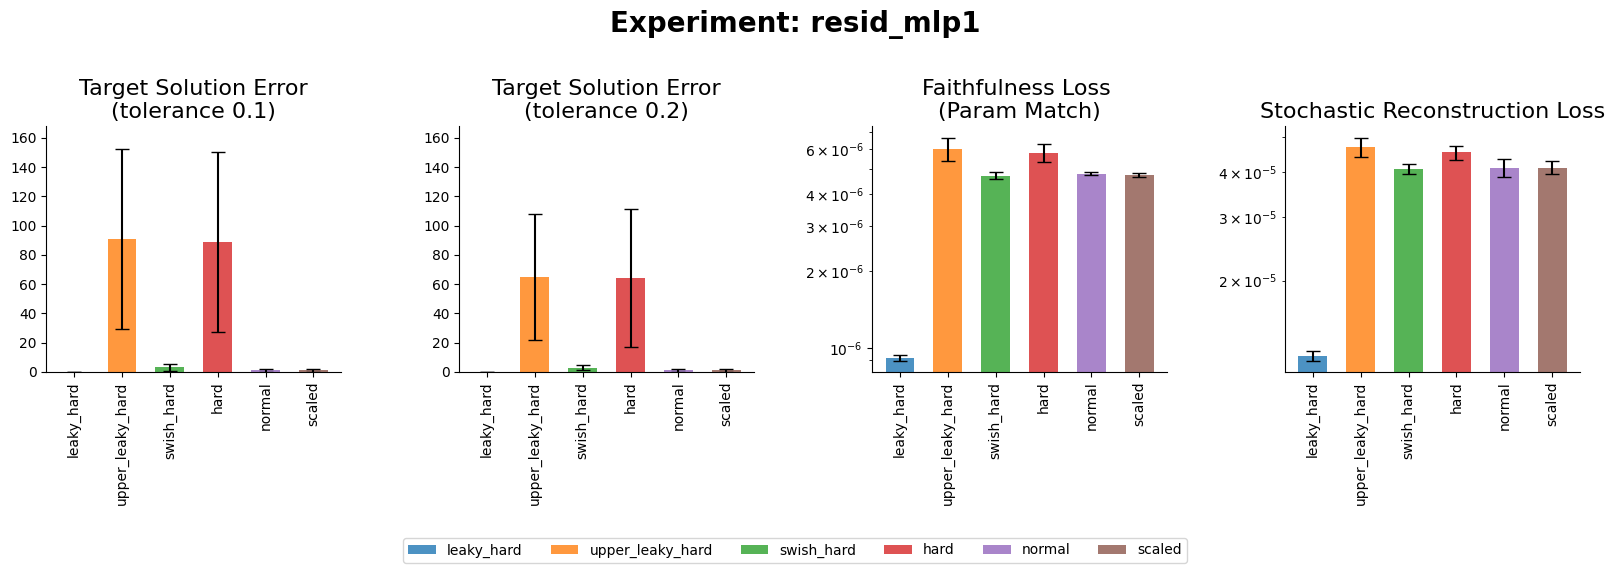

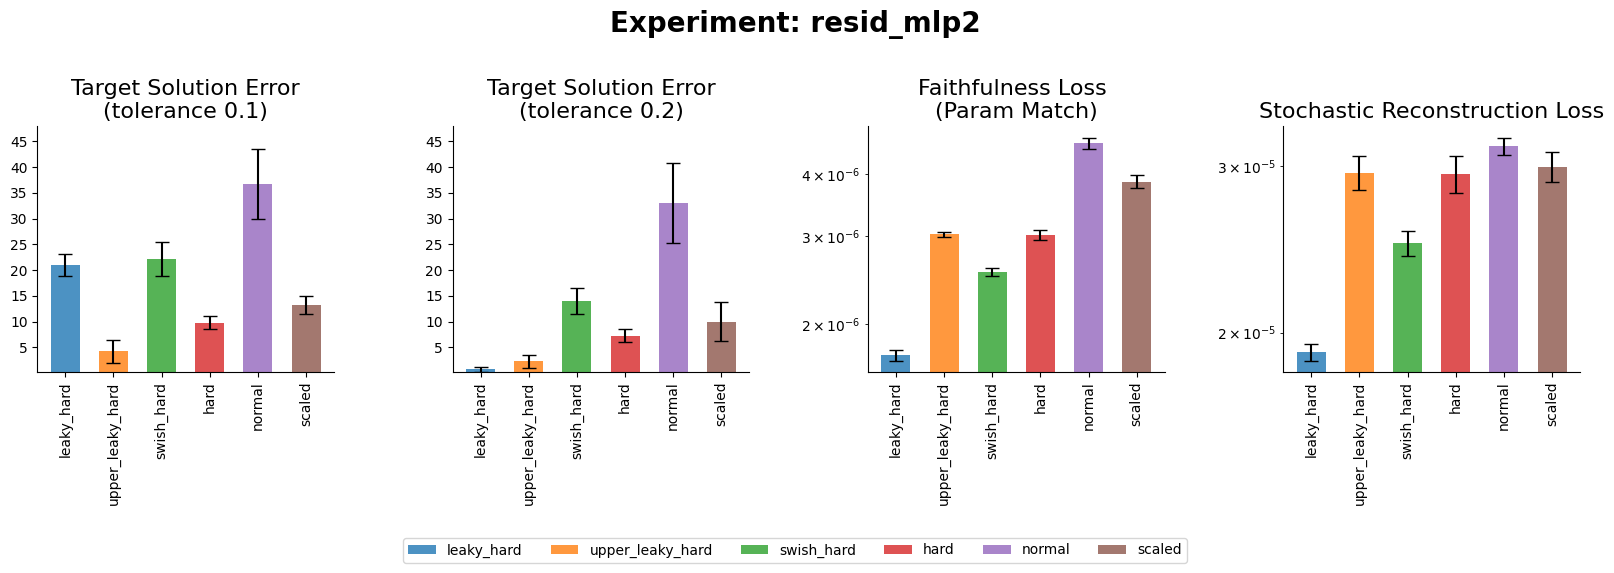

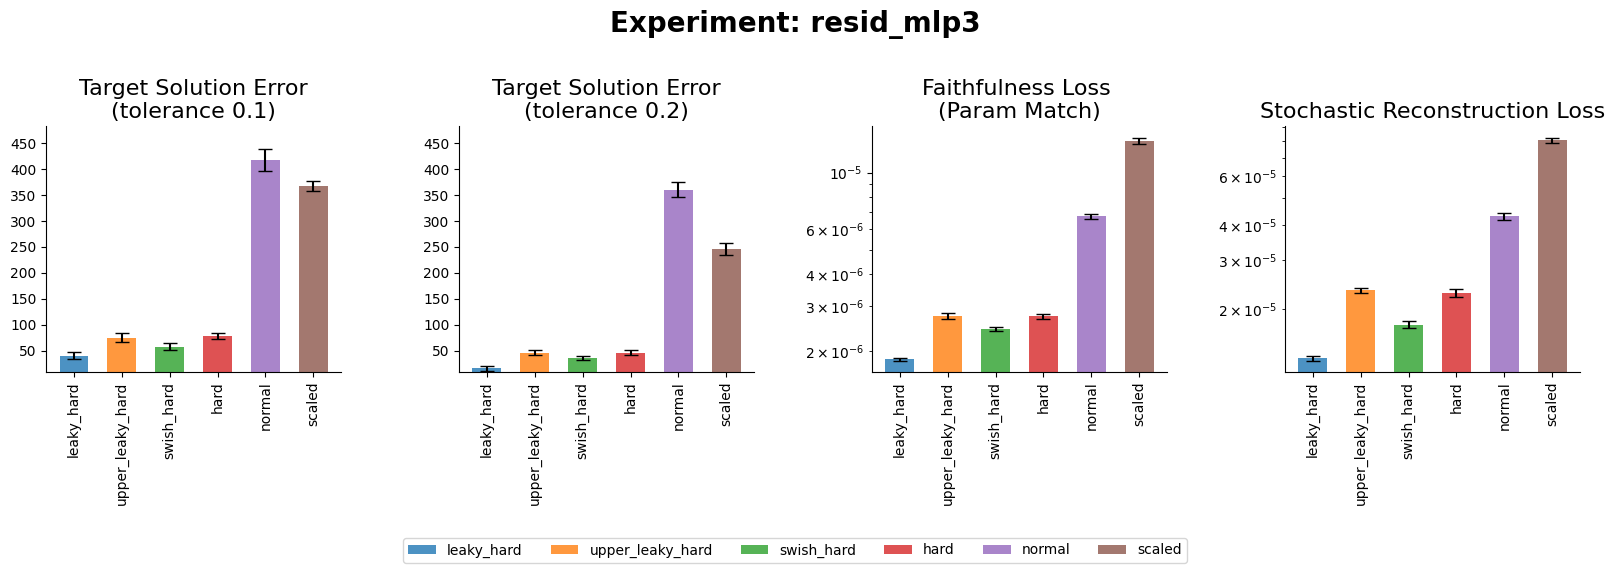

In [16]:
import matplotlib.pyplot as plt

def plot_metrics_by_group(df, y_cols, group_col='group_name', suptitle=None, group_order=None, ):
    """Create bar plots for each metric grouped by group_name."""
    
    fig, axs = plt.subplots(
        nrows=1,
        ncols=len(y_cols),
        figsize=(4 * len(y_cols), 5),
    )
    
    # Get groups in specified order or sorted
    if group_order is not None:
        groups = group_order
    else:
        groups = sorted(df[group_col].unique())
    
    colors = [f'C{i}' for i in range(len(groups))]
    
    # First pass: collect data and find y-limits for target solution error plots
    target_solution_ylims = [float('inf'), float('-inf')]
    all_plot_data = []
    
    for i, (y_col, y_label) in enumerate(y_cols.items()):
        # Calculate stats for each group
        x_pos = []
        means = []
        stds = []
        
        for j, group in enumerate(groups):
            group_data = df[df[group_col] == group][y_col]
            means.append(group_data.mean())
            stds.append(group_data.std())
            x_pos.append(j)
        
        all_plot_data.append((x_pos, means, stds, y_col, y_label))
        
        # Track min/max for target solution error plots
        if 'target_solution_error' in y_col:
            # Calculate the range including error bars
            lower_bounds = [m - s for m, s in zip(means, stds)]
            upper_bounds = [m + s for m, s in zip(means, stds)]
            target_solution_ylims[0] = min(target_solution_ylims[0], min(lower_bounds))
            target_solution_ylims[1] = max(target_solution_ylims[1], max(upper_bounds))
    
    # Second pass: create the plots
    for i, (x_pos, means, stds, y_col, y_label) in enumerate(all_plot_data):
        ax = axs[i]
        
        # Create bars
        bars = ax.bar(x_pos, means, yerr=stds, capsize=5, 
                      color=colors, alpha=0.8, width=0.6)
        
        # Formatting
        ax.set_title(y_label, fontsize=16)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(groups, rotation=90, ha='center')
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Apply different scales based on column type
        if 'loss' in y_col:
            # Log scale for loss columns
            ax.set_yscale('log')
        elif 'target_solution_error' in y_col:
            # Integer scale for target solution error columns
            ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
            # Set shared y-limits for target solution error plots
            ax.set_ylim(target_solution_ylims[0] * 0.9, target_solution_ylims[1] * 1.1)
    
    # Add legend below the plots
    fig.legend(bars, groups, loc='lower center', bbox_to_anchor=(0.5, -0.1), 
               ncol=len(groups))
    
    # Add suptitle if provided
    if suptitle:
        fig.suptitle(suptitle, y=1.02, fontsize=20, fontweight='bold')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)  # Increase horizontal spacing
    return fig, axs

y_cols = {
    'summary.target_solution_error/total': "Target Solution Error\n(tolerance 0.1)",
    'summary.target_solution_error/total_0p2': "Target Solution Error\n(tolerance 0.2)",  
    'summary.loss/faithfulness': 'Faithfulness Loss \n(Param Match)',
    'summary.loss/stochastic_recon': "Stochastic Reconstruction Loss",
}
group_order = ['leaky_hard', 'upper_leaky_hard', 'swish_hard', 'hard', 'normal', 'scaled']
for experiment_name, opt_df in opt_dfs.items():
    # Usage - much simpler!
    plot_metrics_by_group(
        opt_df, y_cols, 
        suptitle=f'Experiment: {experiment_name}',
        group_col='config.sigmoid_type',
        group_order=group_order,
    )

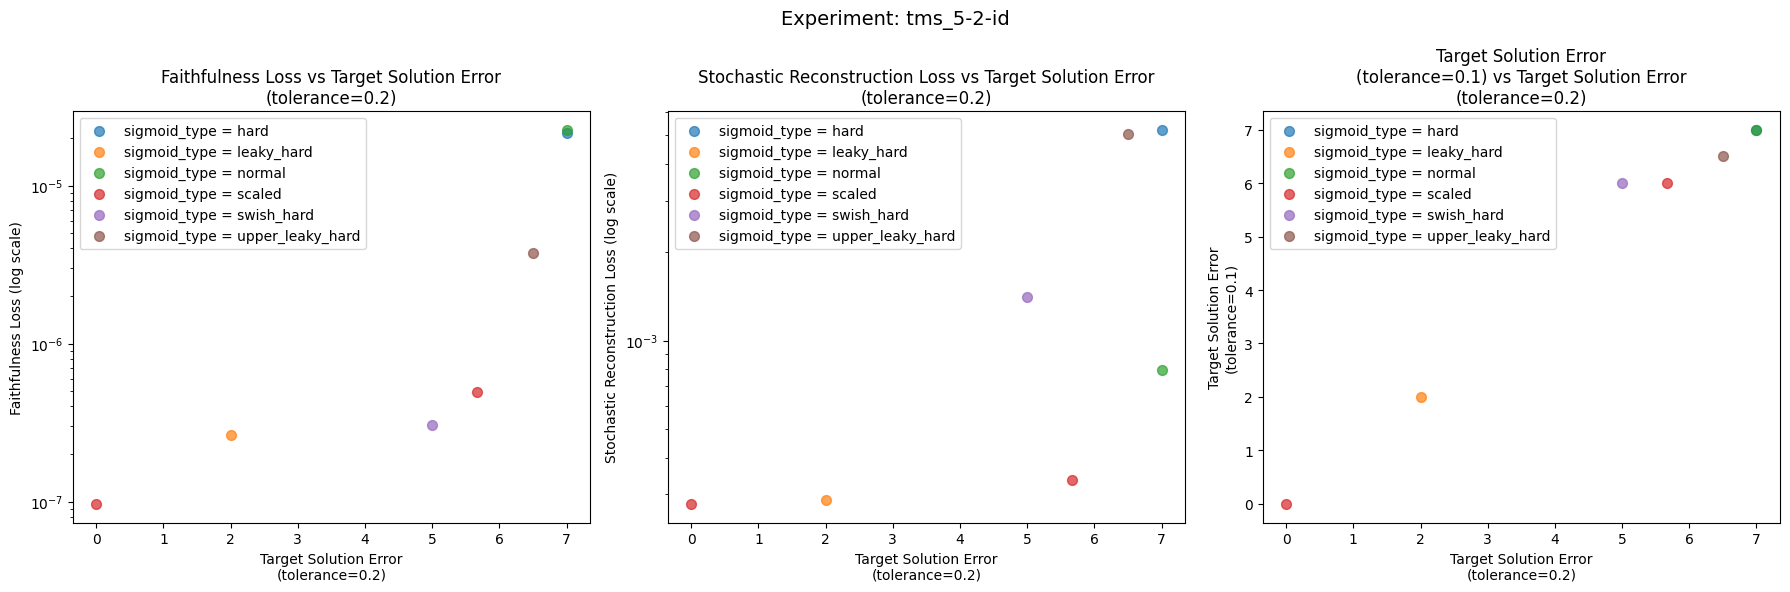

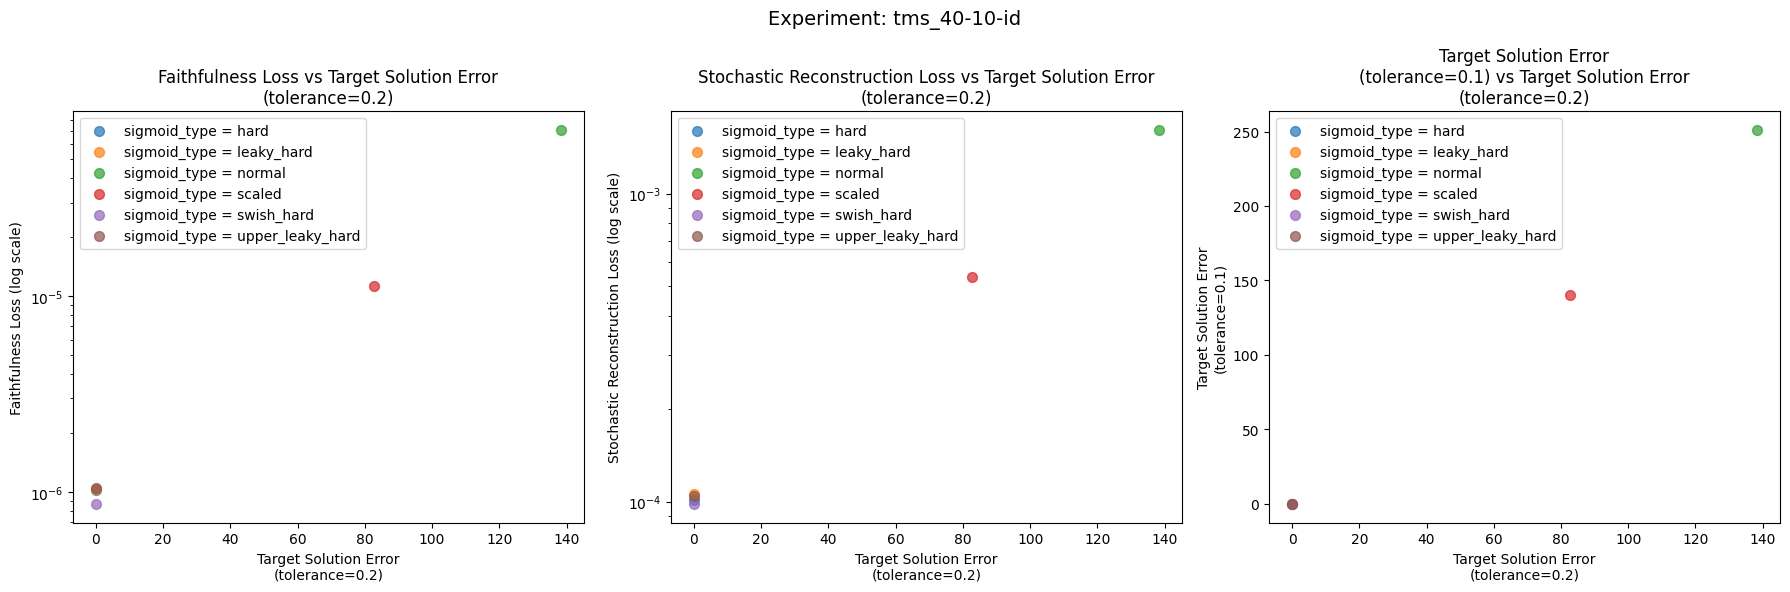

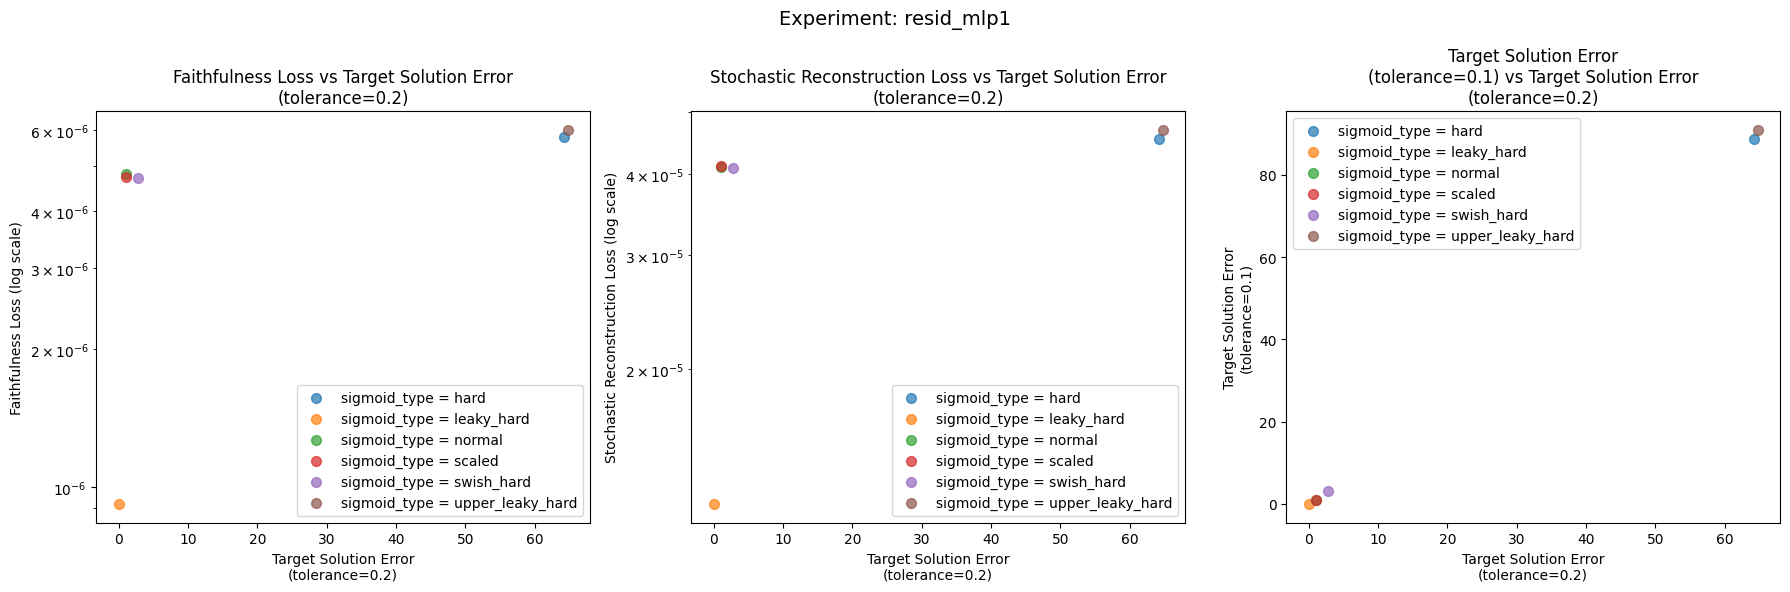

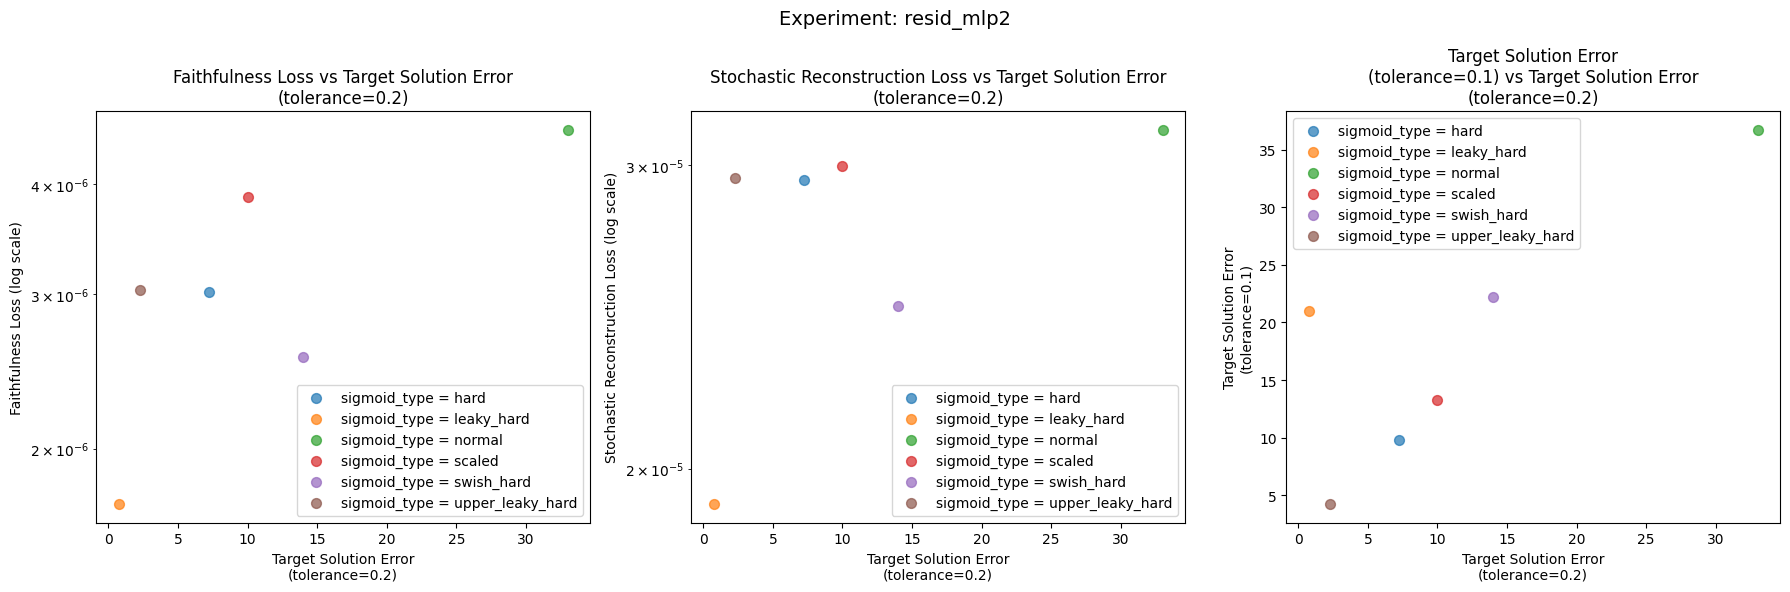

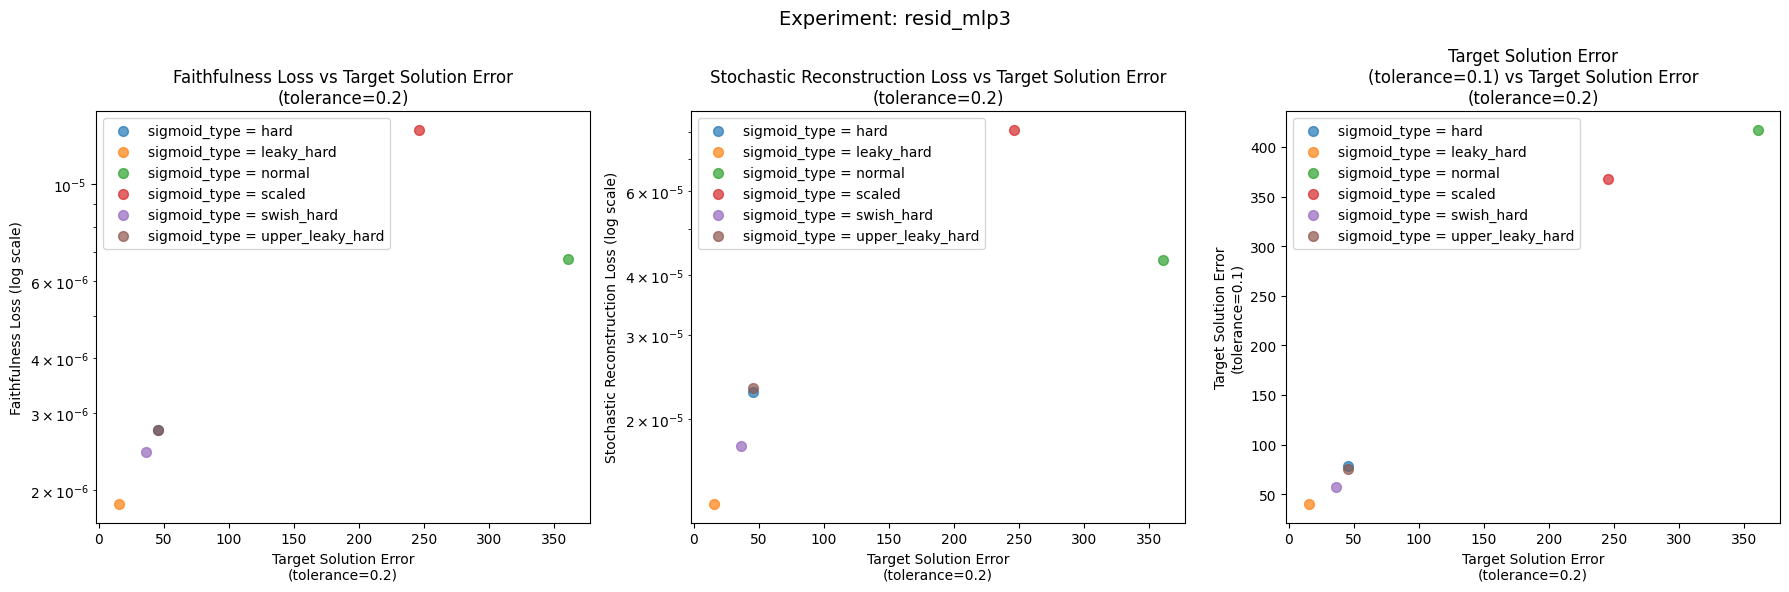

In [17]:
import matplotlib.pyplot as plt

for experiment_name, opt_df in opt_dfs.items():
    # Usage - much simpler!
    plot_scatter_grid(
        aggregate_over(opt_df, 'config.seed'),
        x_col='summary.target_solution_error/total_0p2',
        y_cols=[
            'summary.loss/faithfulness',
            'summary.loss/stochastic_recon',
            'summary.target_solution_error/total'
        ], 
        title=f'Experiment: {experiment_name}',
        group_col='config.sigmoid_type'
    )